In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [6]:
X = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
y = cancer['target']
X.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X.shape

(569, 30)

# Performing PCA
***
1. Eigen value decomposition of the covariance matrix}
2. Singular value decomposition of data matrix
3. Scikit-learn PCA

### Pre-Req: Standardize the Dataset
First, lets rescale our feature vectors

In [10]:
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler().fit_transform(X)
pd.DataFrame(scaled_X,columns=cancer['feature_names']).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# 1. Eigen Value Decomposition of Covariance Matrix 
***

**Step 1:** Calculate the covariance matrix

**Step 2:** Calculate Eigen Vectors and Eigen Values from Covariance Matrix

**Step 3:** Choose Principal Components (Select Eigenvectors with Highest Eigenvalues)

**Step 4:** Project Original Matrix onto Eigenvectors

### Step 1. Calculate the covariance matrix

In [12]:
features = scaled_X.T
covariance_matrix = np.cov(features)
covariance_matrix

array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

### Step 2. Calculate Eigen Vectors and Eigen Values from Covariance Matrix

**Eigen Values** - Determines the magnitude of the vector (higher number captures more variance)

**Eigen Vectors** - Determines the direction of the vector 

In [13]:
# Calculate the eigen vectors and eigen values of the covariance matrix using linalg.eig()
eig_vals,eig_vecs = np.linalg.eig(covariance_matrix)

**Show the eigenvectors**

In [14]:
print("Eigenvectors \n %s" %eig_vecs)

Eigenvectors 
 [[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578e-01 -5.97060883e-02  6.45499033e-02 -6.03050001e-01
   4.94688505e-02 -3.21788366e-02 -1.13995382e-02 -1.30674825e-01
   1.12699390e-01  2.40934066e-01 -3.02243402e-01  2.54896423e-01
   2.03461333e-01  2.15600995e-02  1.07922421e-01 -1.57841960e-01
  -3.87061187e-02 -4.11029851e-02 -2.97886446e-02 -2.73661018e-04
  -1.05339342e-02  6.58114593e-05 -1.73573093e-02  2.45566636e-02
  -8.47459309e-02  9.87867898e-02  5.54997454e-04 -9.48006326e-02
  -2.44134993e-01 -4.48369

**Show the eigenvalues**

In [15]:
print("Eigenvalues \n %s" %eig_vals)

Eigenvalues 
 [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]


**Remember:** the eigenvalues capture the variance of each eigenvector. You can find the variance of each eigenvalue by dividing it by the sum of all eigenvalues

**Examine the first principal component:** About 44% of the variance is captured

In [16]:
# Example: Find the variance captured for the 1st eigenvector (PC1)
# The first principle component captures about 44% of the variance
eig_vals[0]/sum(eig_vals)

0.44272025607526344

**Examine the second principal component:** About 19% of the variance is captured

In [18]:
eig_vals[1]/sum(eig_vals)

0.1897118204403309

### Step 3. Choose Principal Components (Select Eigenvectors with Highest Eigenvalues)
Find the transformation matrix V by selecting eigenvectors with highest eigenvalues (variance)

In [19]:
# Let's choose the first two principle components
V = eig_vecs[:,:2]

### Step 4. Project Original Matrix onto Eigenvectors

Let's project our data points onto PC1 and PC2. The dot product maps the data points onto a new dimension. 

In [21]:
# Examine our new transformed matrix with PC1 & PC2
projected_X = scaled_X.dot(V)
projected_X

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

**Examine Principle Components of EVD**

In [23]:
X_pca = pd.DataFrame(data=projected_X,columns=['PC1','PC2'])
X_pca.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


**Now we have our new reduced dimesionality dataset**

# 2. Singular Value Decomposition 
*** 

**Step 1:** Center the data 

**Step 2:** Apply SVD to the centered data

**Step 3:** Choose number of principle components 

**Step 4:** Compute dot product of matrix X and W

**Step 5:** You now have your new reduced dimensionality of the dataset

### Step 1. Center the Data

In [24]:
X_centered = scaled_X - scaled_X.mean()

### Step 2. Apply SVD

In [25]:
U,s,V = np.linalg.svd(X_centered)

### Step 3. Choose Principal Components (Select Eigenvectors with Highest Eigenvalues)

In [26]:
W = V.T[:,:2]

### Step 4. Project Original Matrix onto Eigenvectors
Compute dot product to project the new reduced dimensionality dataset

In [27]:
projected_X = X_centered.dot(W)

**Examine Principal Components of SVD**

In [28]:
X_pca = pd.DataFrame(data=projected_X,columns=['PC1','PC2'])
X_pca.head()

,PC1,PC2
0,-9.192837,-1.948583
1,-2.387802,3.768172
2,-5.733896,1.075174
3,-7.122953,-10.275589
4,-3.935302,1.948072


# Principal Component Analysis (Scikit-Learn PCA)
***

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcomponents = pca.fit_transform(scaled_X)
X_pca = pd.DataFrame(data=pcomponents,columns=['PC1','PC2'])

In [30]:
X_pca.shape

(569, 2)

**Examine Principal Components**

In [31]:
X_pca.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


# Visualizing Principal Components
***

Let's see if we can examine any patterns from our new dataset.

**Remember:** We reduced the dimensions from 30 to 2 dimensions.

Text(0, 0.5, 'Second principle component')

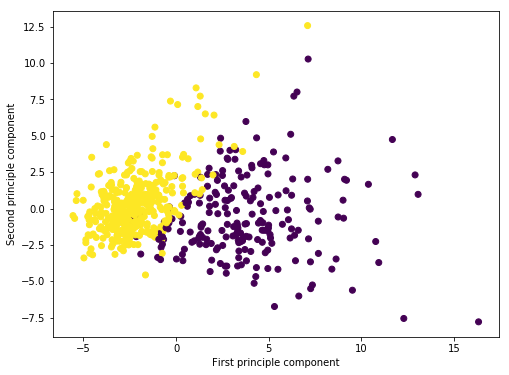

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca['PC1'], X_pca['PC2'], c=cancer['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

## Explained Variance

To get the variance explained of each principal component, we get the eigenvalue and divide by the total sum of eigenvalues

In [33]:
# Get the first PC1 and divide by the total sum of eigenvalues
eig_vals[0] / sum(eig_vals)

0.44272025607526344

**Explained Variance Ratio**

1. PC1 explains about 44% of the total variance

2. PC2 explains about 19% of the total variance

In [34]:
pca.explained_variance_ratio_ 

array([0.44272026, 0.18971182])

## Interpreting Principle Components

In [35]:
pd.DataFrame(pca.components_ ,columns=list(X.columns),index=['PC1','PC2'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


## Choosing the Right Number of Dimensions

The goal is to choose the right number of dimensions that captures the most variance. 

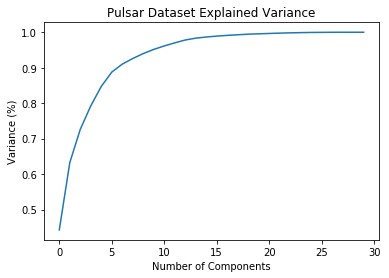

In [37]:
#Fitting the PCA algorithm with our Data
pca2 = PCA().fit(scaled_X)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

## Model Performance without PCA (~95%)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Create logistic regression object
clf = LogisticRegression(random_state=0)

In [40]:
# Split into training and test sets using ORIGINAL dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [41]:
# Train model
model = clf.fit(X_train,y_train)

In [43]:
# Perform 10-Fold Cross Validation
result = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')
result.mean()

0.9571231836032352

## Model Performance with PCA (~98%)

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pcomponents = pca.fit_transform(scaled_X)
X_pca = pd.DataFrame(data = pcomponents)

In [45]:
# Split into training and test sets using REDUCED dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=1)

In [46]:
# Train model
model = clf.fit(X_train,y_train)

In [47]:
# Get predicted probabilities
y_score = clf.predict_proba(X_test)[:,1]

In [49]:
# Perform 10-Fold Cross Validation
result = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')
result.mean()

0.9826355778399826